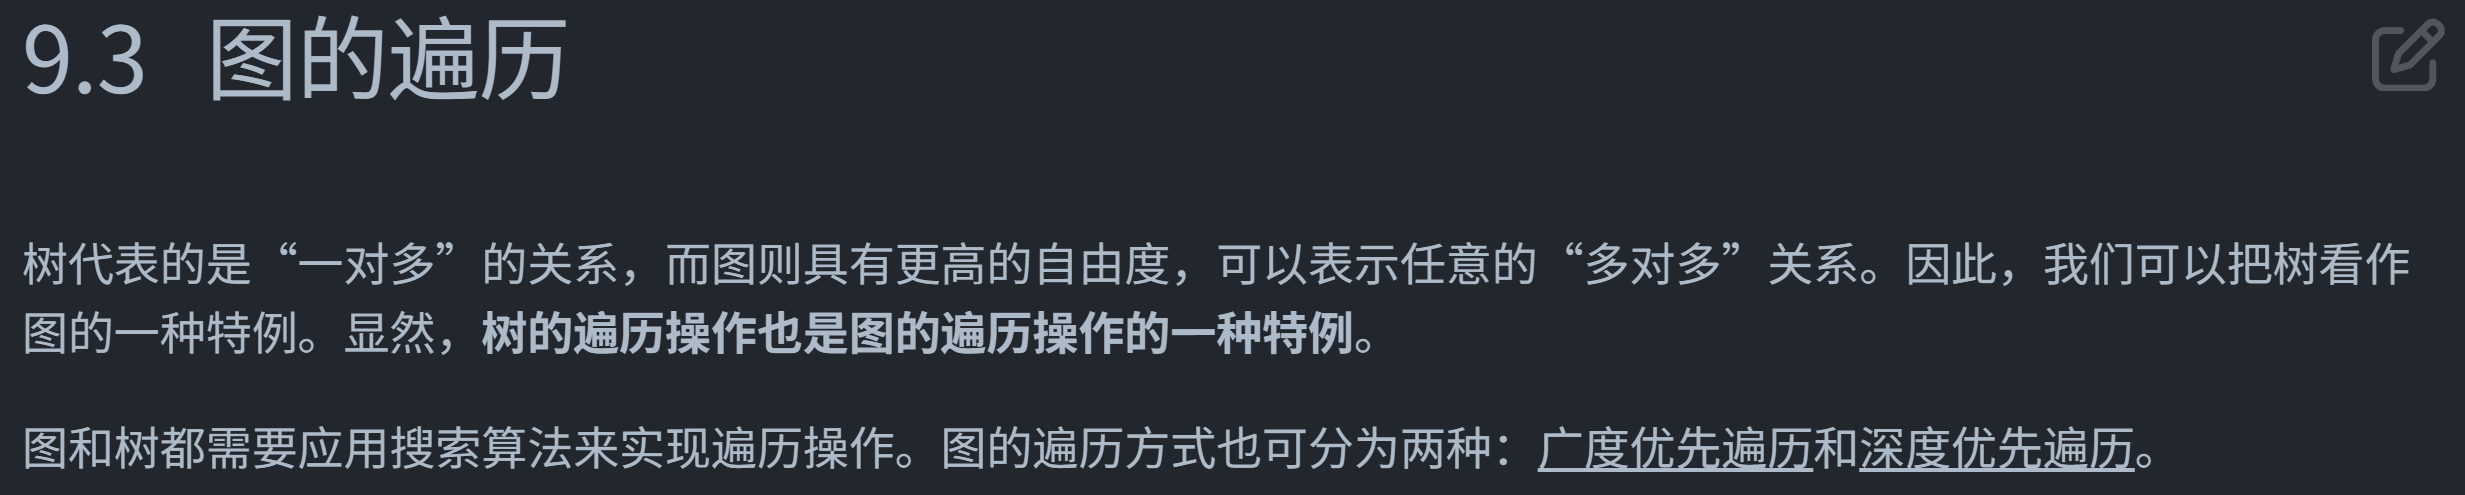
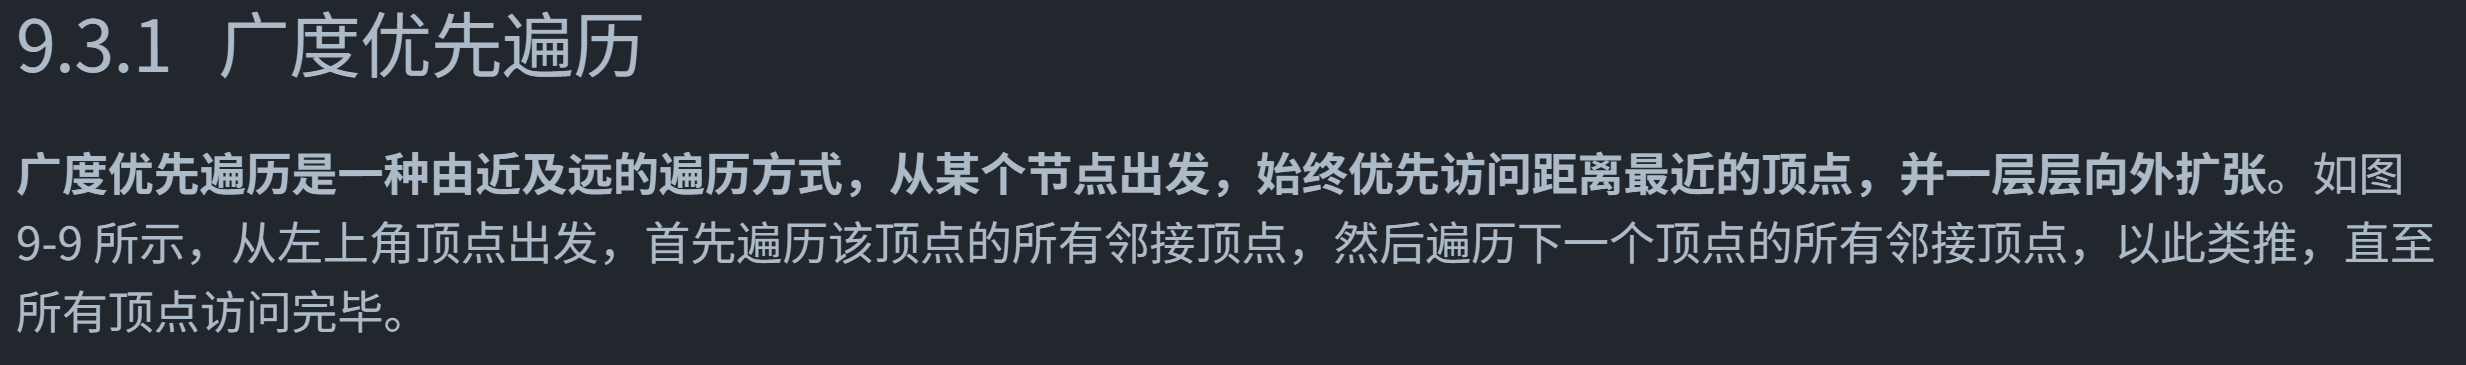
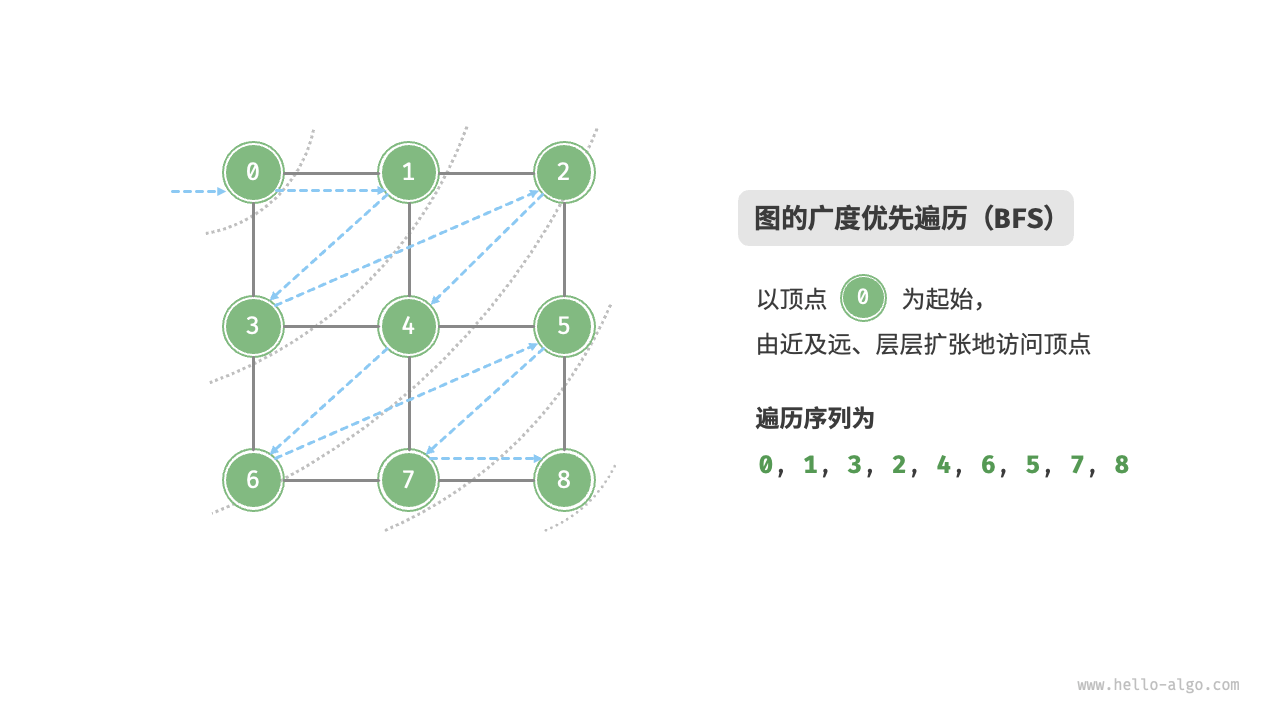

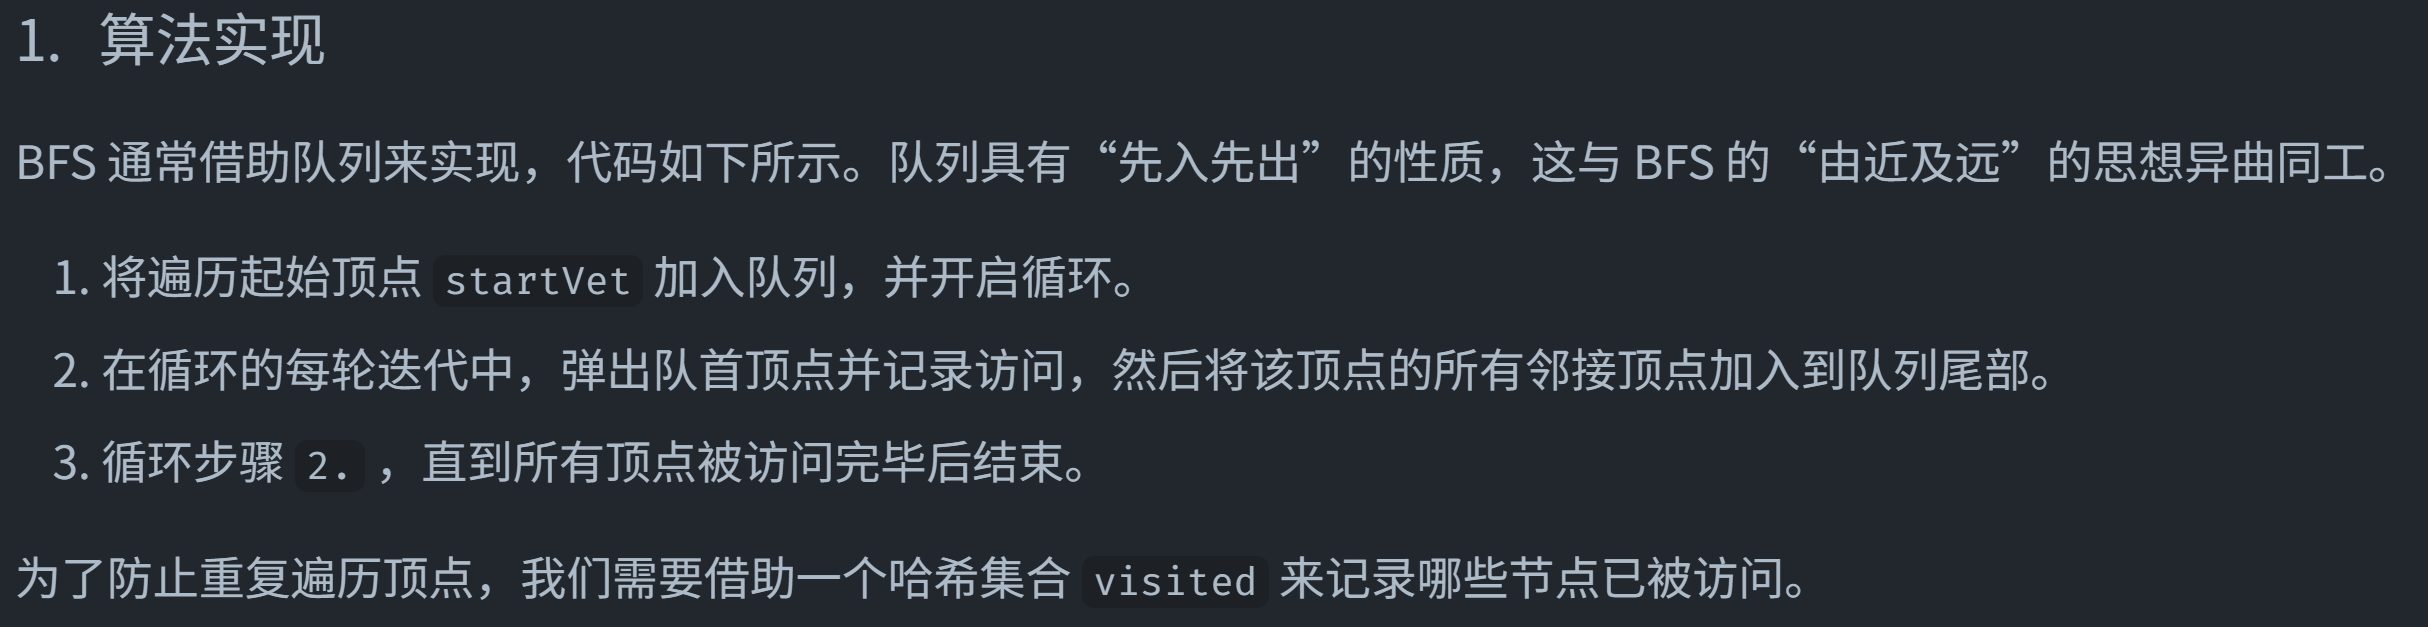
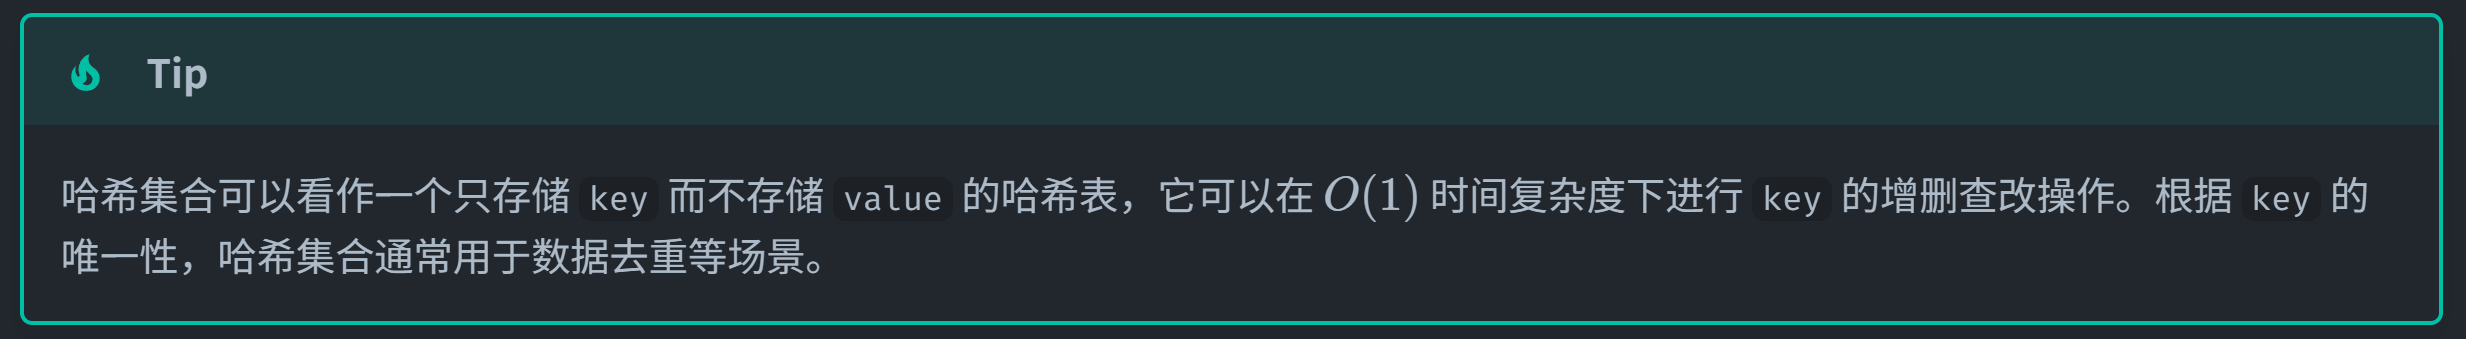

In [5]:
class Vertex():
    """顶点类"""
    def __init__(self, val: int):
        self.val = val
        
def vals_to_vets(vals: list[int]) -> list["Vertex"]:
    """输入值列表 vals , 返回顶点列表 vets"""
    return [Vertex(val) for val in vals]

class GraphAdjList():
    """基于邻接表实现的无向图类"""
    def __init__(self, edges: list[list[Vertex]]) -> None:
        # 邻接表，key：顶点，value：该顶点的所有邻接顶点
        self.adj_list: dict[Vertex, list[Vertex]] = dict()
        # 添加所有顶点和边
        for edge in edges:
            self.add_vertex(edge[0])
            self.add_vertex(edge[1])
            self.add_edge(edge[0], edge[1])
    
    def size(self):
        """获取顶点的数量"""
        return len(self.adj_list.keys())
    
    def add_edge(self, vet1: Vertex, vet2: Vertex):
        """添加边"""
        if vet1 not in self.adj_list or vet2 not in self.adj_list or vet1 == vet2:
            raise IndexError()
        # vet1 - vet2
        self.adj_list[vet1].append(vet2)
        self.adj_list[vet2].append(vet1)
        
    def remove_edge(self, vet1: Vertex, vet2: Vertex):
        """删除边"""
        if vet1 not in self.adj_list or vet2 not in self.adj_list or vet1 == vet2:
            raise IndexError()
        # del
        self.adj_list[vet1].remove(vet2)
        self.adj_list[vet2].remove(vet1)
    
    def add_vertex(self, vet: Vertex):
        """添加节点"""
        if vet in self.adj_list:
            return
        # 在邻接表中添加一个新节点的新链表
        self.adj_list[vet] = []
    
    def remove_vertex(self, vet: Vertex):
        """删除顶点"""
        if vet not in self.adj_list:
            raise ValueError()
        self.adj_list.pop(vet)
        # 删除所有包含vet的边
        for vertex in self.adj_list:
            if vet in self.adj_list[vertex]:
                self.adj_list[vertex].remove(vet)
    
    def print(self):
        """打印"""
        print("邻接表 = ")
        for vertex in self.adj_list:
            tmp = [v.val for v in self.adj_list[vertex]]
            print(f"{vertex.val}: {tmp}, ")   

In [8]:
from collections import deque

def graph_bfs(graph: GraphAdjList, start_vet: Vertex):
    """广度优先遍历"""
    # 使用邻接表来表示图，以便获取指定顶点的所有邻接顶点
    # 顶点遍历序列
    res = []
    # 哈希集合，用于记录已被访问过的顶点    
    visited: set[Vertex] = set([start_vet])
    # 队列用于实现 bfs
    que: Vertex = deque([start_vet])    
    while len(que) > 0:
        vet = que.popleft()
        res.append(vet)
        for v in graph.adj_list[vet]:
            if v in visited:
                continue            
            que.append(v)
            visited.add(v)
    return res

In [11]:
"""Driver Code"""
if __name__ == "__main__":
    # 初始化无向图
    v = vals_to_vets([0, 1, 2, 3, 4])
    edges = [
        [v[0], v[1]],
        [v[0], v[3]],
        [v[1], v[2]],
        [v[1], v[4]],
        [v[3], v[4]],
    ]
    graph = GraphAdjList(edges)
    del edges

    # 广度优先遍历
    res = graph_bfs(graph, v[0])
    
    for i in range(0, len(res)):
        print(res[i].val)

0
1
3
2
4


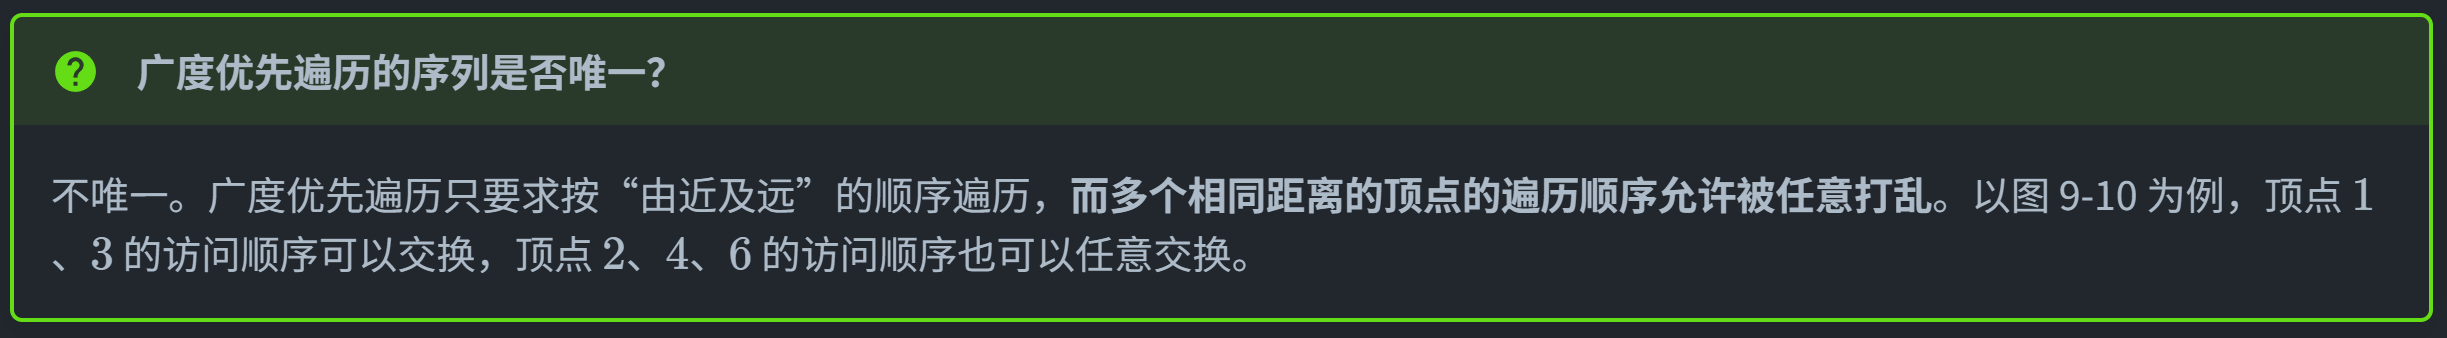
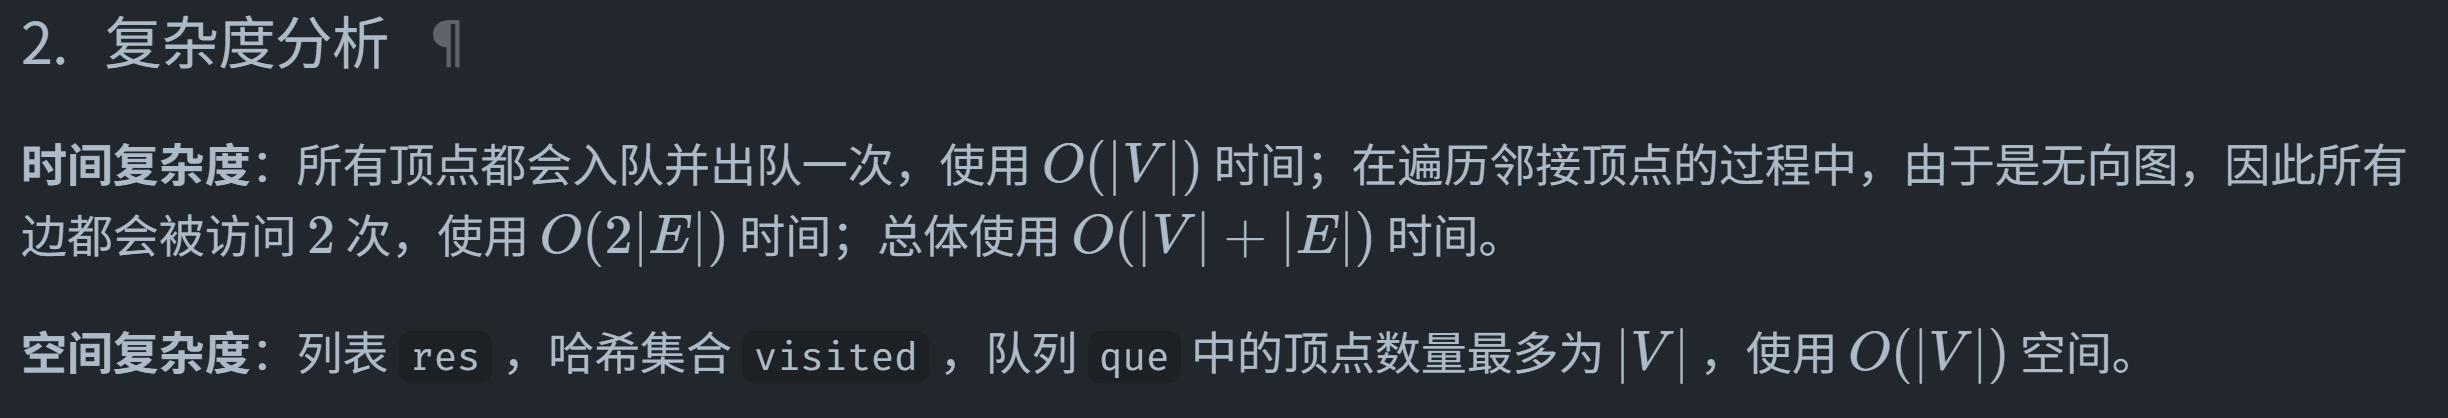

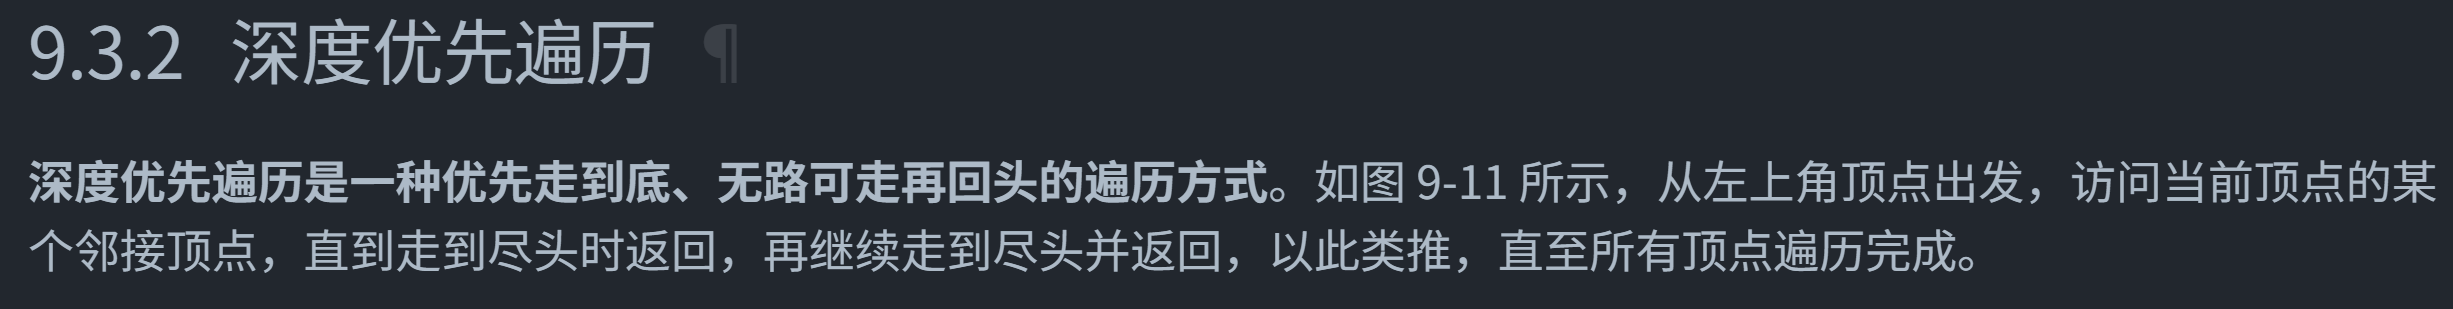
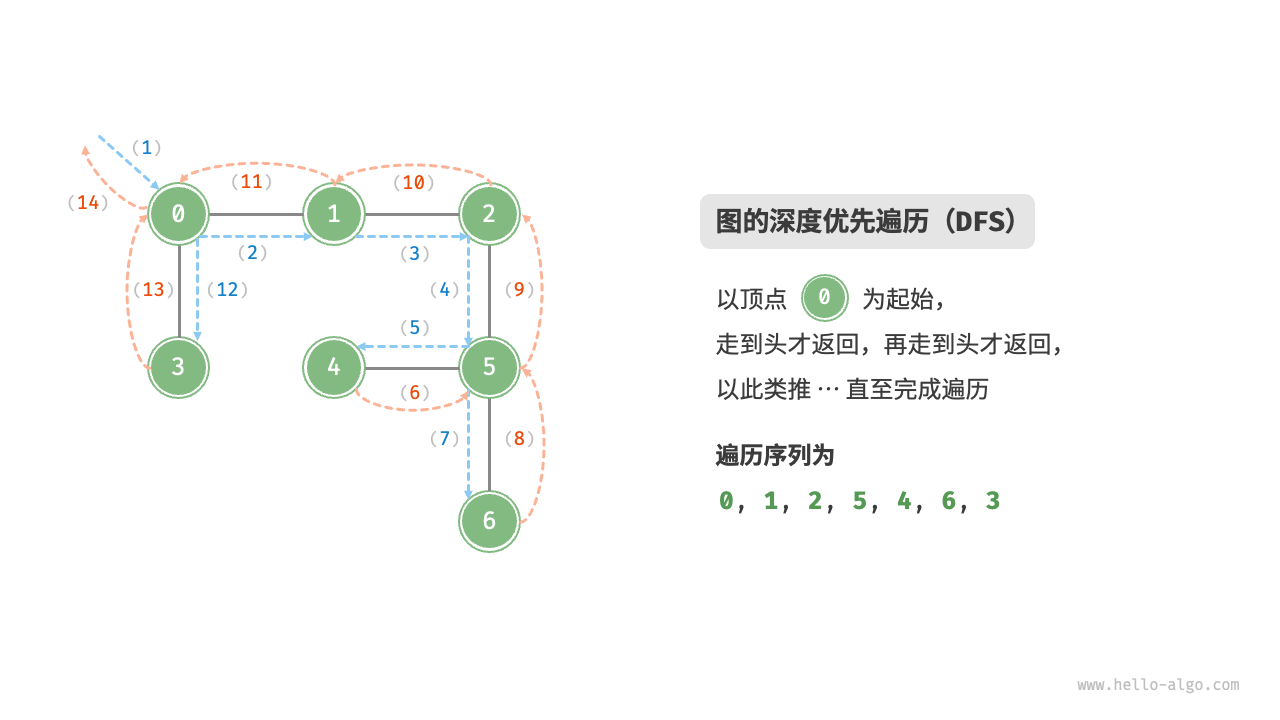
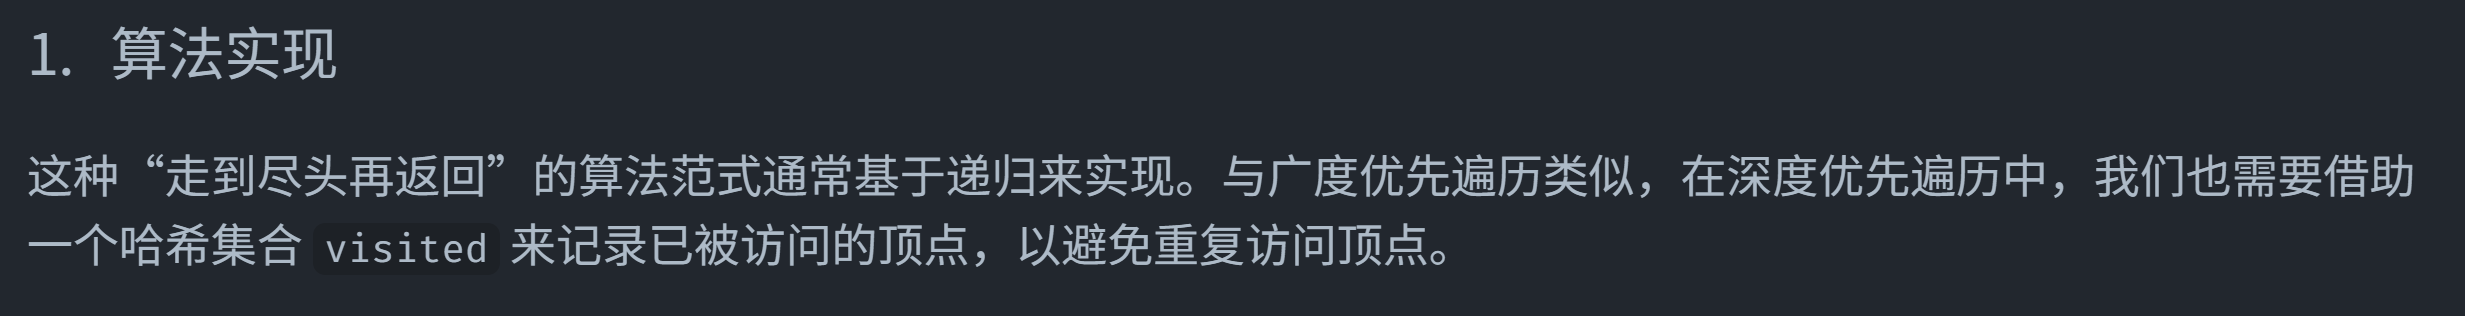

In [13]:
def dfs(graph: GraphAdjList, visited: set[Vertex], res: list[Vertex], vet: Vertex):
    """深度优先遍历辅助函数"""
    res.append(vet)
    visited.add(vet)
    for adjVet in graph.adj_list[vet]:
        if adjVet in visited:
            continue
        # 递归
        dfs(graph, visited, res, adjVet)
    
def graph_dfs(graph: GraphAdjList, start_vet: Vertex) -> list[Vertex]:
    """深度优先遍历"""
    # 使用邻接表来表示图，以便获得指定顶点的所有邻接顶点
    # 顶点遍历序列
    res = []
    # 哈希集合，用于记录已被访问过的顶点
    visited = set[Vertex]()
    dfs(graph, visited, res, start_vet)
    return res

In [15]:
"""Driver Code"""
if __name__ == "__main__":
    # 初始化无向图
    v = vals_to_vets([0, 1, 2, 3, 4])
    edges = [
        [v[0], v[1]],
        [v[0], v[3]],
        [v[1], v[2]],
        [v[1], v[4]],
        [v[3], v[4]],
    ]
    graph = GraphAdjList(edges)

    # 深度优先遍历
    res = graph_dfs(graph, v[0])
    
    for i in range(0, len(res)):
        print(res[i].val)

0
1
2
4
3


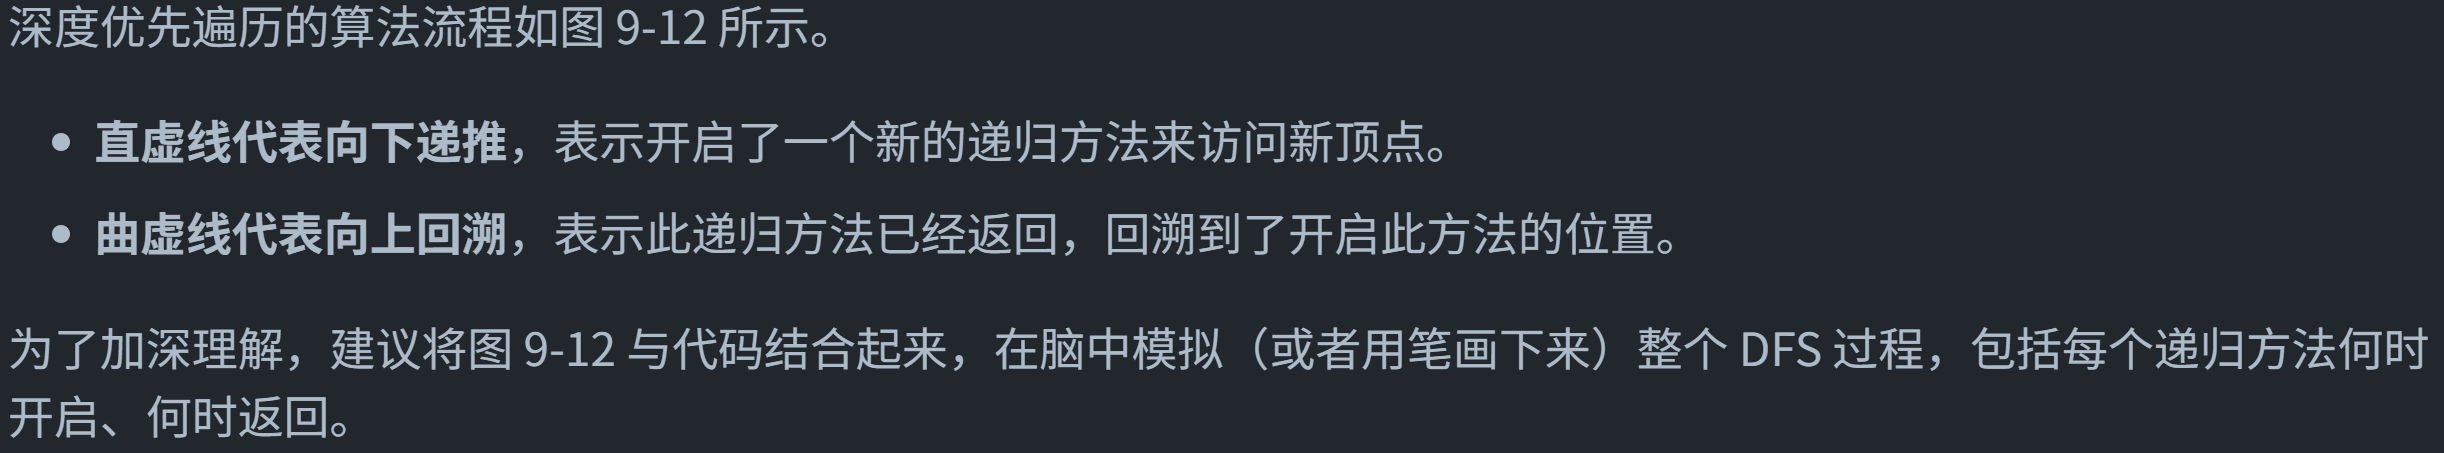
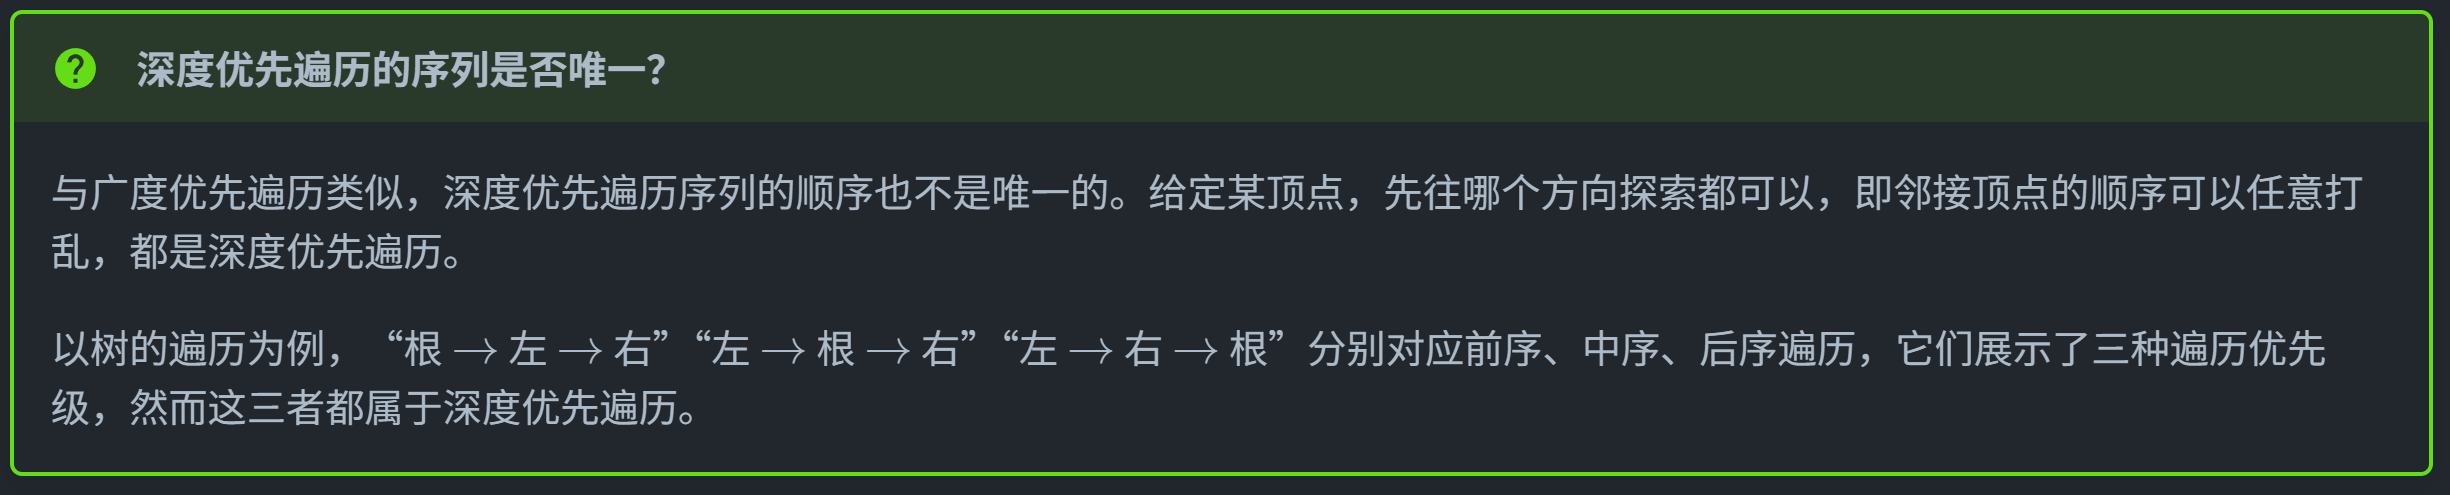

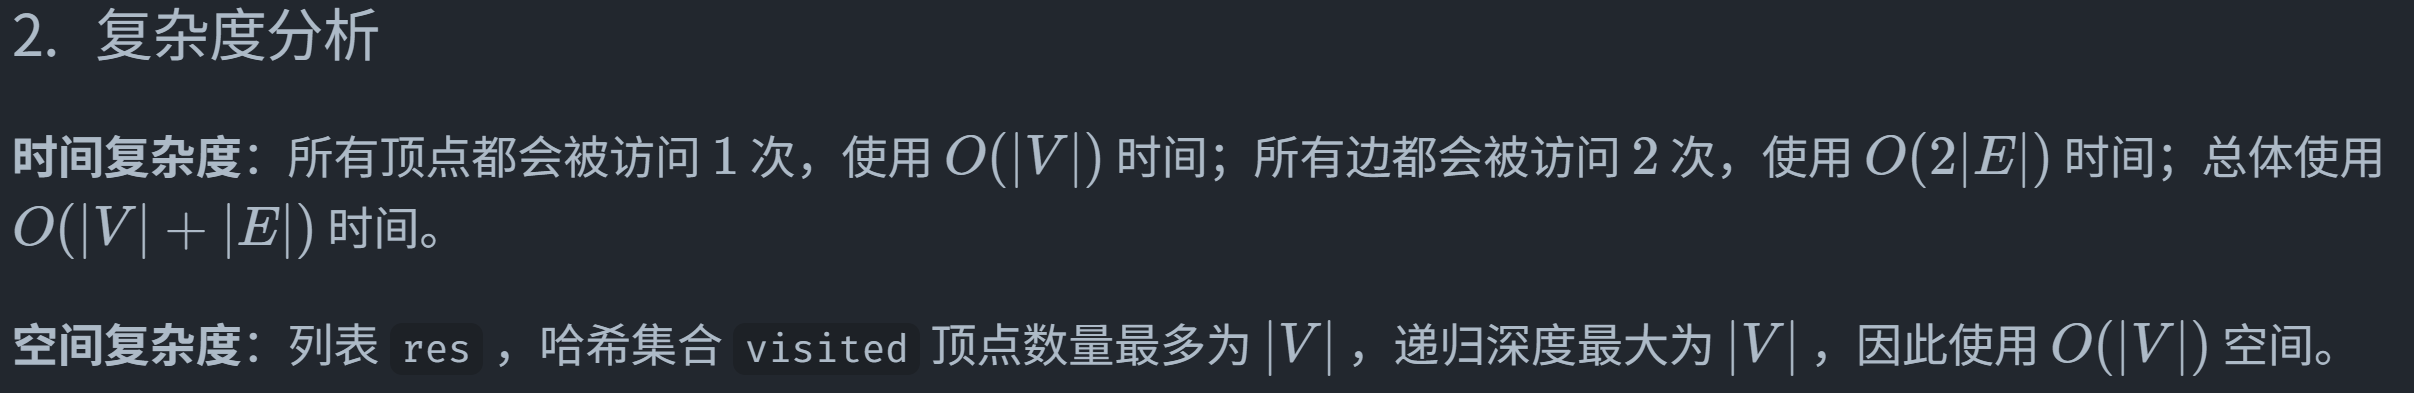